# Pandas groupby()

This is a notebook for the medium article [Pandas groupby](https://bindichen.medium.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


## 1. What is Pandas groupby()

In [4]:
# It returns a DataFrameGroupBy object
df_groupby_sex = df.groupby('Sex')
type(df_groupby_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
# To get the number of groups
df_groupby_sex.ngroups

# len(df_groupby_sex)

2

In [10]:
# Stat of each group
df_groupby_sex.size()

Sex
female    256
male      456
dtype: int64

In [11]:
# Get groupby objects
df_groupby_sex.groups

{'female': [1, 2, 5, 8, 10, 21, 22, 25, 26, 27, 36, 41, 44, 47, 51, 58, 60, 65, 70, 71, 72, 76, 77, 78, 80, 87, 88, 93, 94, 95, 100, 102, 104, 105, 109, 113, 116, 119, 120, 121, 123, 129, 134, 138, 144, 146, 147, 148, 152, 157, 162, 166, 167, 168, 169, 171, 172, 174, 176, 178, 179, 180, 181, 182, 183, 189, 190, 192, 194, 198, 199, 201, 205, 207, 213, 221, 222, 226, 228, 229, 232, 235, 237, 240, 242, 243, 244, 252, 253, 255, 264, 265, 267, 269, 270, 279, 282, 284, 292, 294, ...], 'male': [0, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 66, 67, 68, 69, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 96, 97, 98, 99, 101, 103, 106, 107, 108, 110, 111, 112, 114, 115, 117, 118, 122, 124, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 139, 140, 141, 142, 143, ...]}

In [12]:
df_groupby_sex.first()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,C
male,493,0,1,"Molson, Mr. Harry Markland",55.0,0,0,113787,30.5000,C30,S


In [13]:
df_groupby_sex.last()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",24.0,0,3,2666,19.2583,B57 B59 B63 B66,C
male,476,0,1,"Clifford, Mr. George Quincy",35.0,0,0,110465,52.0000,A14,S


In [14]:
# To retrieve one of the created groups
df_female = df_groupby_sex.get_group('female')
df_female.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",36.0,0,0,27849,13.0000,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",55.0,0,0,248706,16.0000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",45.0,1,4,347088,27.9000,NaN,S
10,541,1,1,"Crosby, Miss. Harriet R",36.0,0,2,WE/P 5735,71.0000,B22,S


In [16]:
# Display all methods
import IPython

methods = [method_name for method_name in dir(df_groupby_sex) 
           if callable(getattr(df_groupby_sex, method_name)) & ~method_name.startswith('_')]

print(IPython.utils.text.columnize(methods))

agg        corrwith  diff       idxmax  nth         rank      sum      
aggregate  count     expanding  idxmin  nunique     resample  tail     
all        cov       ffill      last    ohlc        rolling   take     
any        cumcount  fillna     mad     pad         sample    transform
apply      cummax    filter     max     pct_change  sem       tshift   
backfill   cummin    first      mean    pipe        shift     var      
bfill      cumprod   get_group  median  plot        size    
boxplot    cumsum    head       min     prod        skew    
corr       describe  hist       ngroup  quantile    std     



## 2. The “group by” process: split-apply-combine

Generally speaking, “group by” is referring to a process involving one or more of the following steps:
* Splitting the data into groups
* Applying a function to each group independently
* Combining the results into a data structure.

## 3. Aggregation

### With column

In [17]:
df.groupby('Sex').Age.max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [18]:
df.groupby('Sex').Age.min()

Sex
female    0.75
male      0.42
Name: Age, dtype: float64

In [19]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [20]:
df.groupby('Sex').Age.count()

Sex
female    211
male      355
Name: Age, dtype: int64

### With `agg()`
* With multiple aggregation functions
* Custom column name
* Custom aggregator

In [21]:
# there is a function called .agg() and it allows us to specify multiple aggregation functions at once
df.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
Sex,,,,,
female,63.0,0.75,211,27.0,28.062796
male,80.0,0.42,355,28.0,30.804000


In [22]:
# with custom column name
df.groupby('Sex').Age.agg(
    sex_max=('max'),
    sex_min=('min'),
)

,sex_max,sex_min
Sex,,
female,63.0,0.75
male,80.0,0.42


In [23]:
# Custom aggregation function
def categorize(x):
    m = x.mean()
    return True if m > 29 else False

df.groupby('Sex').Age.agg(['max', 'mean', categorize])

,max,mean,categorize
Sex,,,
female,63.0,28.062796,False
male,80.0,30.804000,True


In [24]:
# Use lambda
df.groupby('Sex').Age.agg(
    ['max', 'mean', lambda x: True if x.mean() > 29 else False]
)

,max,mean,<lambda_0>
Sex,,,
female,63.0,28.062796,False
male,80.0,30.804000,True


### Without column

In [25]:
# Turns out when writting a groupby you don't actually have to specify a column like beer_servings. Without a column, 
# it will perform the aggregation across all of the numeric columns 
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,425.140625,0.753906,2.128906,28.062796,0.652344,0.652344,44.835532
male,449.791667,0.188596,2.390351,30.804000,0.418860,0.236842,26.233971


In [26]:
df.groupby('Sex').agg(['mean', 'median'])

PassengerId         Survived           Pclass               Age         \
              mean median      mean median      mean median       mean median   
Sex                                                                             
female  425.140625  396.0  0.753906      1  2.128906      2  28.062796   27.0   
male    449.791667  454.5  0.188596      0  2.390351      3  30.804000   28.0   

           SibSp            Parch              Fare         
            mean median      mean median       mean median  
Sex                                                         
female  0.652344      0  0.652344      0  44.835532  24.15  
male    0.418860      0  0.236842      0  26.233971  10.50

## 4. Transforming data

In [27]:
# A lambda expression for Standardization.
standardization = lambda x: (x - x.mean()) / x.std()

In [28]:
df.groupby('Sex').Age.transform(standardization)

0      1.630657
1      1.516751
2      0.574994
3     -0.795515
4     -1.132483
         ...   
707   -0.294321
708         NaN
709    0.956720
710    0.282784
711         NaN
Name: Age, Length: 712, dtype: float64

In [29]:
df.groupby('Sex').Age.apply(standardization)

0      1.630657
1      1.516751
2      0.574994
3     -0.795515
4     -1.132483
         ...   
707   -0.294321
708         NaN
709    0.956720
710    0.282784
711         NaN
Name: Age, Length: 712, dtype: float64

## 5. Filtering data

In [30]:
# Let's group by Cabin and take a quick look at the size for each group
df.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F2     2
F33    3
F4     1
G6     2
T      1
Length: 128, dtype: int64

In [31]:
# filter data to return all passengers that lived in a cabin has ≥ 4 people.
df.groupby('Cabin').filter(lambda x: len(x) >= 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
96,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
105,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
208,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S
237,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
302,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
450,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
629,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S


## 6. Group by multiple category

In [33]:
# Creating a subset
subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]

In [34]:
# Grouping by multiple categories
subset.groupby(['Sex', 'Pclass']).mean()

Age        Fare
Sex    Pclass                       
female 1       33.873239  104.311563
       2       28.647541   21.658730
       3       22.389241   15.650187
male   1       42.006329   70.611438
       2       29.946667   19.463516
       3       26.720995   12.488267

## 7. Resetting index with `as_index` 

In [35]:
# Group by multi column
df_groupby_multi = subset.groupby(['Sex', 'Pclass']).mean()

In [36]:
df_groupby_multi.reset_index()

,Sex,Pclass,Age,Fare
0,female,1,33.873239,104.311563
1,female,2,28.647541,21.658730
2,female,3,22.389241,15.650187
3,male,1,42.006329,70.611438
4,male,2,29.946667,19.463516
5,male,3,26.720995,12.488267


In [37]:
# A better way is to set as_index=False
subset.groupby(['Sex', 'Pclass'], as_index=False).mean()

,Sex,Pclass,Age,Fare
0,female,1,33.873239,104.311563
1,female,2,28.647541,21.658730
2,female,3,22.389241,15.650187
3,male,1,42.006329,70.611438
4,male,2,29.946667,19.463516
5,male,3,26.720995,12.488267


## 8. Handling missing values in the group keys

In [38]:
subset.head()

,Sex,Pclass,Age,Fare
0,male,1,55.0,30.5000
1,female,1,49.0,76.7292
2,female,2,36.0,13.0000
3,male,2,19.0,13.0000
4,male,3,14.0,39.6875


In [39]:
# Create some missing values in Sex column
subset.iloc[80:100, 0] = np.nan

In [40]:
subset.isna().sum()

Sex        20
Pclass      0
Age       146
Fare        0
dtype: int64

In [41]:
# The groupby function ignores the missing values by default.
subset.groupby(['Sex', 'Pclass']).mean()

Age        Fare
Sex    Pclass                       
female 1       33.928571  104.448418
       2       28.483051   21.381148
       3       22.904605   15.675305
male   1       42.182432   66.485236
       2       29.287671   19.300104
       3       26.641726   12.595923

In [42]:
subset.groupby(['Sex', 'Pclass'], dropna=False).mean()

Age        Fare
Sex    Pclass                       
female 1       33.928571  104.448418
       2       28.483051   21.381148
       3       22.904605   15.675305
male   1       42.182432   66.485236
       2       29.287671   19.300104
       3       26.641726   12.595923
NaN    1       37.833333  128.111314
       2       43.750000   28.062500
       3       21.500000   10.005556

## Display it in visual form

In [22]:
%matplotlib inline

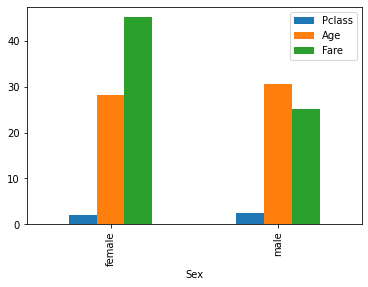

In [44]:
subset.groupby('Sex').mean().plot(kind='bar')